In [34]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('../data/day_head_circumference.csv', dtype='float')
train_y = train.pop('head circumference')

train_x = torch.tensor(train.to_numpy(), dtype=torch.float)
train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float).reshape(-1,1)

1000


In [29]:

class NonLinearRegressionModel:
    def __init__(self, max):
        self.max = max
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)
        
    def f(self, x):
        return 20 * torch.sigmoid((x @ self.W + self.b)) + 31

    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y)

In [30]:
model = NonLinearRegressionModel(train.shape[0])

optimizer = torch.optim.SGD([model.W,model.b], 0.000001)
for epoch in range(100000):
    model.loss(train_x, train_y).backward() 
    optimizer.step() 

    optimizer.zero_grad()  

print("W = %s, b = %s, loss = %s" %(model.W, model.b, model.loss(train_x, train_y)))


W = tensor([[0.0025]], requires_grad=True), b = tensor([[-0.1177]], requires_grad=True), loss = tensor(2.6798, grad_fn=<MseLossBackward>)


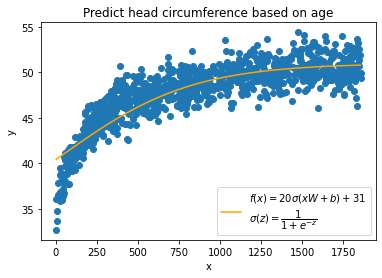

In [33]:
plt.figure('Nonlinear regression 2d')
plt.title('Predict head circumference based on age')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(train_x, train_y)
x = torch.arange(torch.min(train_x), torch.max(train_x), 1.0).reshape(-1, 1)
y = model.f(x).detach()
plt.plot(x, y, color='orange',
         label='$f(x) = 20\sigma(xW + b) + 31$ \n$\sigma(z) = \dfrac{1}{1+e^{-z}}$')

plt.legend()
plt.show()